## Importamos libreria y datos a trabajar

In [1]:
# Importacion de librerias
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------------------------------------------------
# Configuración

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.float_format', '{:,.2f}'.format) # Evitar notación científica y establecer formato de dos decimales






## Carga de datos

In [2]:
df = pd.read_pickle("../datos/output_data/df_limpio.pkl")

## Objetivo de analisis.

 Analizar los resultados fiscales de los años seleccionados, evaluando la relación entre ingresos efectivos y previstos en el presupuesto en los distintos ministerios, con énfasis en sus fuentes de financiamiento y el monto asignado a cada uno.

 La misión es identificar patrones, detectar áreas problemáticas donde la recaudación ha sido consistentemente menor a lo previsto


## 01.01. Agrupacion de de ministerios

In [3]:
df_ministerios = df.groupby(["NOM_organo_superior"])[['valor_previsto_actualizado','valor_recaudado','valor_lanzado']].sum() ## Agrupamos por ministerios
df_ministerios["dif_prev_recaudado"] = (df_ministerios["valor_recaudado"]-df_ministerios["valor_previsto_actualizado"]) ## Vemos la diferencia entre el valor de recaudacion actualizado y el real.
df_ministerios["porcentaje"] = (df_ministerios["valor_recaudado"]/df_ministerios["valor_previsto_actualizado"]*100) 
df_ministerios = df_ministerios.sort_values(["porcentaje"], ascending=[False]) ## ordenamos por porcentaje

## 01.02. Analisis estadistico de variables numericas con dataframe de ministerios.

In [4]:
df_ministerios.describe().T

,count,mean,std,min,25%,50%,75%,max
valor_previsto_actualizado,25.00,"1,133,502,952,474.75","5,283,625,117,623.79","37,327,399.00","843,366,940.00","36,304,805,355.02","87,492,532,893.00","26,486,420,136,019.00"
valor_recaudado,25.00,"1,025,495,297,417.84","4,934,594,426,431.50","7,555,037.45","334,962,977.49","13,535,637,878.06","40,047,759,133.20","24,709,753,338,137.24"
valor_lanzado,25.00,"215,227,466,590.78","1,073,366,026,466.02",0.00,0.00,0.00,"11,831.64","5,367,369,003,775.87"
dif_prev_recaudado,25.00,"-108,007,655,056.91","357,550,454,653.72","-1,776,666,797,881.76","-38,815,494,119.82","-4,979,298,326.38","-292,512,448.94","16,234,017,546.34"
porcentaje,25.00,61.40,37.34,1.02,36.35,55.89,92.23,141.06


### 1. Valor previsto actualizado
La media de los valores previstos es de 1.13 billones, con una desviación estándar extremadamente alta (5.28 billones). Esto sugiere una gran disparidad entre los ministerios en cuanto a sus presupuestos previstos.
Hay ministerios con valores previstos tan bajos como 37 millones, mientras que el mayor previsto asciende a más de 26 billones.
¿Que podriamos buscar? Analizar qué ministerios tienen presupuestos significativamente más altos y por qué.

### 2. Valor recaudado
El valor recaudado promedio es de 1.02 billones, también con una gran variación (4.93 billones).
El rango va desde ingresos mínimos de 7 millones hasta máximos de 24 billones, lo que indica que algunos ministerios lograron recaudar montos significativos, mientras que otros están muy por debajo de los valores previstos.

### 3. Valor lanzado
La mayoría de los ministerios tienen un valor lanzado de cero. Solo unos pocos tienen datos sobre este valor, lo que podría indicar que esta métrica no se registra uniformemente.
¿Que podriamos buscar? Sería interesante investigar qué significa este valor en detalle y por qué es cero en la mayoría de los casos.

### 4. Diferencia entre previsto y recaudado
En promedio, los ministerios no lograron recaudar lo previsto, con una diferencia media de -108 mil millones.
Hay ministerios con diferencias extremadamente negativas (hasta -1.77 billones), mientras que otros lograron superar el previsto (+16.23 mil millones).
¿Que podriamos buscar? Ministerios con grandes desviaciones (positivas o negativas) para entender los factores detrás de estas variaciones.

### 5. Porcentaje realizado
El porcentaje promedio realizado es del 61.4%, con un rango que va desde un bajo 1.02% hasta un notable 141.06%.
Algunos ministerios lograron exceder el 100% de sus previsiones, mientras que otros apenas recaudaron un pequeño porcentaje de lo previsto. Esto puede ser indicativo de una buena planificación o de ajustes presupuestarios posteriores.


### Conclusiones y posibles análisis
- Analizar qué ministerios tuvieron un alto porcentaje de cumplimiento y cuáles quedaron muy por debajo.
- Explorar cómo afecta esta diferencia a la gestión de recursos y al cumplimiento de metas.
- Ver si los ministerios con mayores presupuestos previstos tienden a cumplir menos en proporción que los más pequeños.
- Aunque hay pocos datos sobre "valor lanzado", sería interesante ver cómo afecta a la capacidad de recaudar ingresos.

In [5]:
df_ministerios

,valor_previsto_actualizado,valor_recaudado,valor_lanzado,dif_prev_recaudado,porcentaje
NOM_organo_superior,,,,,
Ministério da Pesca e Aquicultura,"40,939,194.00","57,749,317.66",0.00,"16,810,123.66",141.06
"Ministério das Mulheres, Igualdade Racial, da","109,699,610.00","136,845,774.52",0.00,"27,146,164.52",124.75
Ministério da Infraestrutura,"119,972,882,836.00","136,206,900,382.34",0.00,"16,234,017,546.34",113.53
Ministério do Turismo,"13,828,150,327.00","13,535,637,878.06","51,866,238.80","-292,512,448.94",97.88
Ministério do Trabalho e Emprego,"14,328,825,280.00","13,484,362,951.59",0.00,"-844,462,328.41",94.11
Ministério da Economia,"26,486,420,136,019.00","24,709,753,338,137.24","5,367,369,003,775.87","-1,776,666,797,881.76",93.29
Ministério do Desenvolvimento Agrário,"558,355,581.00","514,953,670.74",0.00,"-43,401,910.26",92.23
Ministério da Saúde,"46,656,321,844.00","37,786,245,892.63","125,949,190.83","-8,870,075,951.37",80.99
Ministério das Comunicações,"50,303,390,042.00","40,047,759,133.20","11,831.64","-10,255,630,908.80",79.61


# 01.03. Insight Generales:

### Grandes diferencias entre valores previstos y realizados:

Algunos ministerios tienen una discrepancia significativa entre el valor previsto y lo recaudado. Por ejemplo:

Controladoria-Geral da União: Sólo recaudó una pequeña fracción del valor previsto (1%), lo que sugiere problemas graves de presupuestos o ingresos sobreestimados. Advocacia-Geral da União, Ministério da Cidadania, Ministério do Desenvolvimento Regional por ejemplo también tienen una baja recaudacion real siendo un porcentaje mínimo del presupuesto previsto.

### Valores negativos en la diferencia prevista-recaudada:
Los valores negativos en la columna dif_prev_recaudado para algunos ministerios (por ejemplo, Ministerio de Infraestructura y Ministerio de Pesca y Acuicultura) sugieren que recaudaron más de lo presupuestado, lo cual podría reflejar ingresos inesperados o una subestimación inicial.

### Analisis de Valor lanzado. 
Muy pocos ministerios son los que hacen rendiciond de cuentas de los valores devengados en sus ministerios, ademas los pocos que hay, son muy inferiores a los ingresos recaudados. Mejorar el control indicando el devengamiento de egresos e ingresos de todos los ministerios. 

### Impacto del porcentaje realizado (%):
La columna % muestra grandes disparidades entre los ministerios. Algunos están muy por encima del 100% (excediendo sus proyecciones), mientras que otros están muy por debajo, lo que indica una disparidad en la planificación y ejecución presupuestaria entre las distintas áreas del gobierno.

### Posibles causas de estas discrepancias:
- Factores externos: Cambios económicos, crisis o ingresos no recurrentes.
- Ineficiencia en la recaudación: Problemas administrativos o evasión fiscal.
- Optimismo excesivo: Proyecciones de ingresos no basadas en datos realistas.
- Ingresos extraordinarios: Algunos ministerios pueden haber recibido ingresos inesperados.

### En general, estos datos destacan la necesidad de revisar y ajustar los mecanismos de proyección y recaudación de ingresos para mejorar la alineación entre lo previsto y lo realizado en cada ministerio.



## 01.04 Grafico

C:\Users\Agus\AppData\Local\Temp\ipykernel_8656\2526595673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


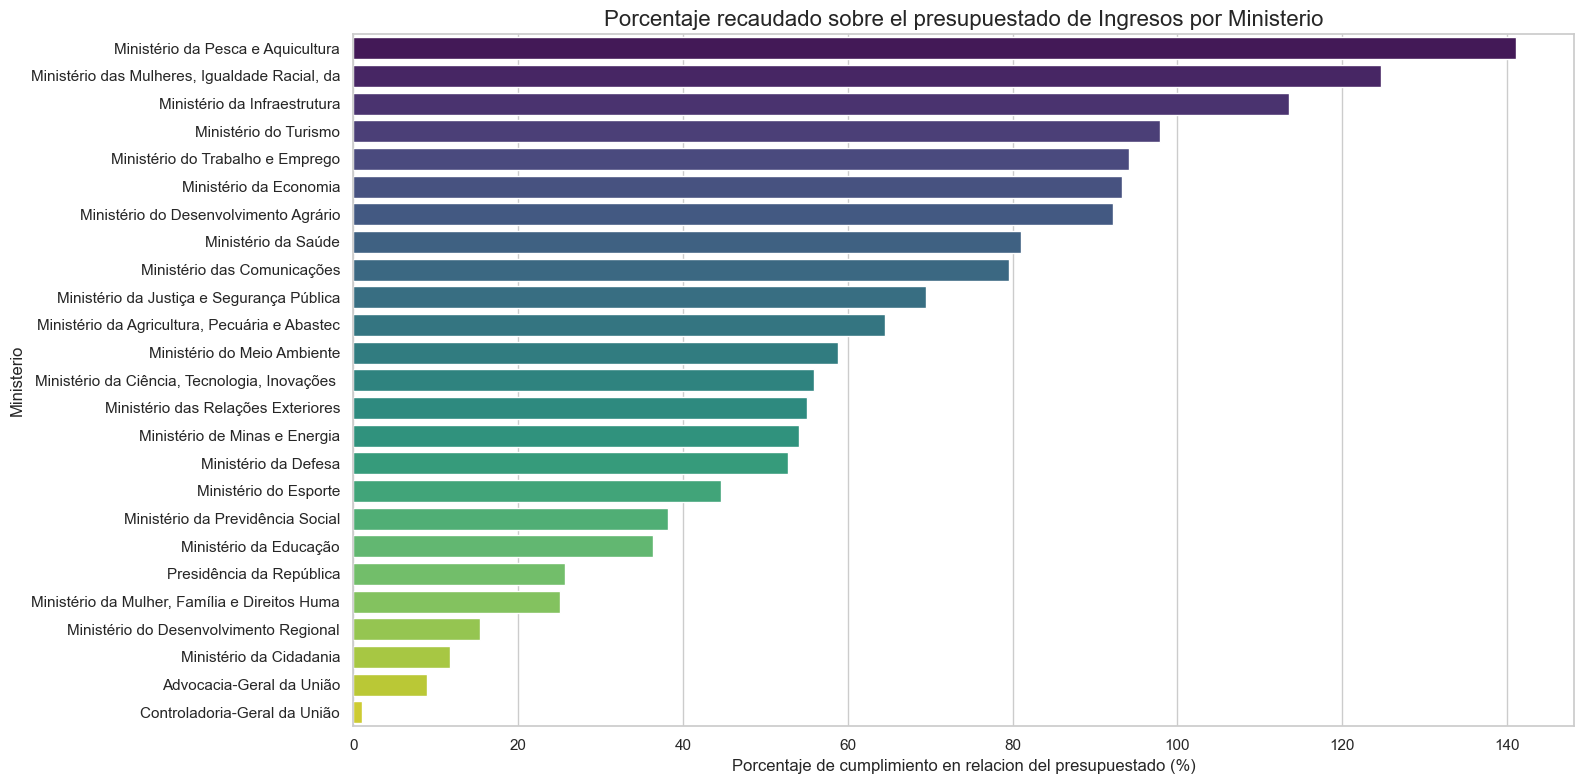

In [6]:
# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un gráfico de barras para visualizar el porcentaje realizado por cada organismo
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_ministerios.sort_values("porcentaje", ascending=False),
    x="porcentaje",
    y="NOM_organo_superior",
    palette="viridis"
)

# Agregar etiquetas y título
plt.xlabel("Porcentaje de cumplimiento en relacion del presupuestado (%)", fontsize=12)
plt.ylabel("Ministerio", fontsize=12)
plt.title("Porcentaje recaudado sobre el presupuestado de Ingresos por Ministerio", fontsize=16)
plt.tight_layout()

# Mostrar gráfico
plt.show()

## 02.01 Agrupacion por categoria economica

In [7]:
df_cat_econom = df.groupby(['origen_ingreso'])[['valor_previsto_actualizado','valor_recaudado','valor_lanzado']].sum() ## Agrupamos por categoria economica
df_cat_econom["dif_prev_recaudado"] = (df_cat_econom["valor_recaudado"]-df_cat_econom["valor_previsto_actualizado"]) ## Vemos la diferencia entre el valor de recaudacion actualizado y el real.
df_cat_econom["porcentaje"] = (df_cat_econom["valor_recaudado"]/df_cat_econom["valor_previsto_actualizado"]*100) 
df_cat_econom = df_cat_econom.sort_values(["porcentaje"], ascending=[False]) ## ordenamos por porcentaje

df_cat_econom

,valor_previsto_actualizado,valor_recaudado,valor_lanzado,dif_prev_recaudado,porcentaje
origen_ingreso,,,,,
Sem informação,0.00,46.57,"2,812,347,576.39",46.57,inf
Amortizações de Empréstimos,"468,392,937,016.00","799,034,542,267.89",0.00,"330,641,605,251.89",170.59
Outras Receitas de Capital,"1,169,948,076,486.00","1,722,900,919,485.78",0.00,"552,952,842,999.78",147.26
Receita Patrimonial,"922,348,554,822.03","957,334,879,441.78","380,086,767.00","34,986,324,619.75",103.79
Receita Industrial,"20,116,477,675.00","19,256,167,707.50",0.00,"-860,309,967.50",95.72
"Impostos, Taxas e Contribuições de Melhoria","4,510,210,765,178.00","4,287,292,710,249.35","2,020,808,903,486.62","-222,918,054,928.65",95.06
Contribuições,"7,415,248,660,408.00","7,043,604,161,886.25","3,220,620,507,720.18","-371,644,498,521.75",94.99
Outras Receitas Correntes,"527,337,121,145.00","495,575,920,557.84","136,055,962,948.35","-31,761,200,587.16",93.98
Receita de Serviços,"440,758,536,057.11","410,410,034,253.08",0.00,"-30,348,501,804.03",93.11


# 02.02. Insight Generales:
### Fuentes de ingresos destacadas por cumplimiento
"Amortizações de Empréstimos" y "Outras Receitas de Capital" superan significativamente los valores previstos, con porcentajes de cumplimiento del 170.59% y 147.26%, respectivamente. Esto indica que estas fuentes recaudaron mucho más de lo esperado.

¿Que podriamos buscar?  Explorar las razones detrás de este sobrecumplimiento, como ingresos inesperados o infraestimaciones en las proyecciones.
"Receita Patrimonial" tiene un desempeño notable con un cumplimiento del 103.79%. Esto indica una buena planificación presupuestaria.

### Fuentes de ingresos con menor desempeño
"Receitas Correntes - a classificar" muestra un valor recaudado negativo (-15.47 mil millones), lo que podría ser un error contable o un ajuste significativo.
"Alienação de Bens" y "Transferências de Capital" tienen un bajo desempeño, con cumplimientos del 38.92% y 43.93%, respectivamente. Esto podría deberse a dificultades en la venta de bienes o en la recepción de transferencias de capital.

¿Que podriamos buscar? Investigar por qué "Receitas Correntes - a classificar" tiene un valor negativo y su impacto en el balance general.

### Fuentes de ingresos con cumplimiento cercano al 100%
"Receita Industrial", "Impostos, Taxas e Contribuições de Melhoria", y "Contribuições" tienen cumplimientos entre el 94% y el 96%. Esto indica proyecciones razonablemente precisas y ejecución cercana a lo planeado.
¿Que podriamos buscar? Evaluar qué factores impidieron alcanzar el 100% en estas categorías.

### Grandes brechas entre valores previstos y recaudados
"Operações de Crédito" tiene una brecha significativa, con un valor recaudado de 9.88 billones frente a un previsto de 12.79 billones, lo que representa un cumplimiento del 77.31%.
¿Que podriamos buscar? Esto puede reflejar desafíos en la obtención de créditos o una menor necesidad de financiamiento de lo estimado.

"Contribuições" también tiene una gran diferencia de -371.64 mil millones, pero con un cumplimiento alto (94.99%). Esto sugiere que aunque hay desviaciones, las recaudaciones están cerca de lo previsto.

### Outliers
"Sem informação" y "Receitas Correntes - a classificar" tienen valores aparentemente irreales, este dato podría tratarse de un error en la clasificación o una inconsistencia en los registros.
¿Que podriamos buscar?  Verificar la fuente de estos datos para determinar su validez.

### Conclusiones generales
- Algunas fuentes como "Amortizações de Empréstimos" sugieren una subestimación de ingresos o circunstancias excepcionales que impulsaron la recaudación.
- Categorías como "Alienação de Bens" necesitan un análisis detallado para entender por qué se encuentran tan por debajo de lo esperado.
- La mayoría de las fuentes están cerca del 100% de cumplimiento, lo que indica una planificación razonablemente efectiva en general.
- Los valores negativos o inconsistencias en categorías como "Sem informação" y "Receitas Correntes - a classificar" deben ser investigados para evitar impactos en futuros informes y presupuestos.


## 02.03 Grafico

C:\Users\Agus\AppData\Local\Temp\ipykernel_8656\274533699.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


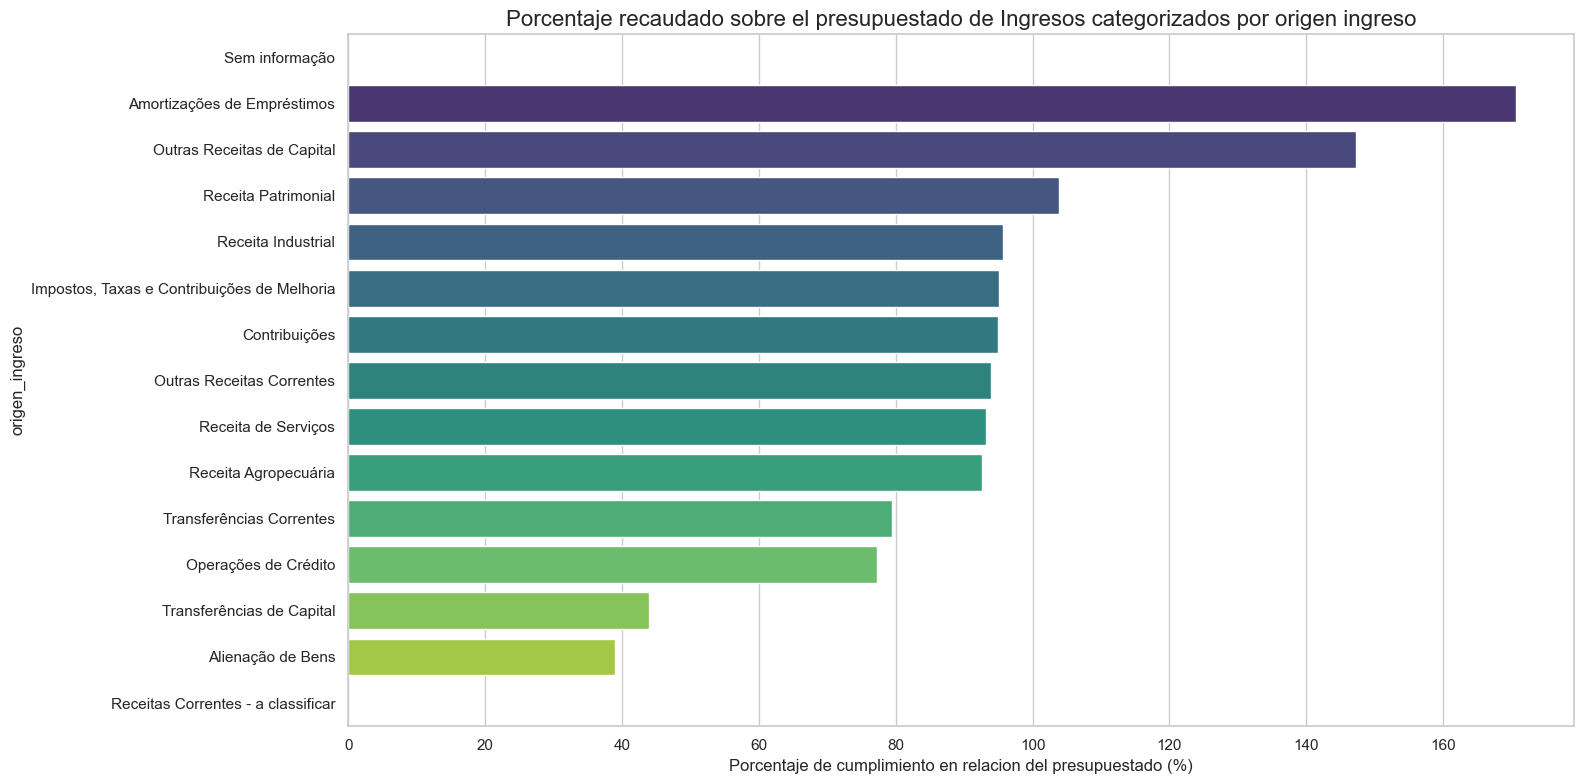

In [8]:
# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un gráfico de barras para visualizar el porcentaje realizado por cada organismo
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_cat_econom.sort_values("porcentaje", ascending=False),
    x="porcentaje",
    y="origen_ingreso",
    palette="viridis"
)

# Agregar etiquetas y título
plt.xlabel("Porcentaje de cumplimiento en relacion del presupuestado (%)", fontsize=12)
plt.ylabel("origen_ingreso", fontsize=12)
plt.title("Porcentaje recaudado sobre el presupuestado de Ingresos categorizados por origen ingreso", fontsize=16)
plt.tight_layout()

# Mostrar gráfico
plt.show()

# 03.01 Analisis entre los 4 peores ministerios y su origen de ingresos

In [9]:
# Filtrar el DataFrame para los ministerios seleccionados
peor_mins=["Ministério do Desenvolvimento Regional","Ministério da Cidadania","Advocacia-Geral da União","Controladoria-Geral da União"]
df_filtrado_peor_mins = df[df["NOM_organo_superior"].isin(peor_mins)]

#Agrupamos por ministerio y el origen del ingreso
df_peor_mins = df_filtrado_peor_mins.groupby(['NOM_organo_superior', 'origen_ingreso'])[['valor_previsto_actualizado', 'valor_recaudado']].sum()

# Creamos porcentaje de diferencia entre presupuestado y recaudado
df_peor_mins ["porcentaje"] = (df_peor_mins ["valor_recaudado"]/df_peor_mins ["valor_previsto_actualizado"]*100) 


df_peor_mins

valor_previsto_actualizado  \
NOM_organo_superior                    origen_ingreso                                                            
Advocacia-Geral da União               Alienação de Bens                                                  0.00   
                                       Contribuições                                                      0.00   
                                       Impostos, Taxas e Contribuições de Melhoria                        0.00   
                                       Operações de Crédito                                   3,717,765,276.00   
                                       Outras Receitas Correntes                                          0.00   
                                       Receita Patrimonial                                                0.00   
                                       Receita de Serviços                                        5,901,000.00   
                                       Receitas Correntes - a classificar                                 0.00   
                                       Transferências Correntes                                   2,387,375.00   
Controladoria-Geral da União           Operações de Crédito                                     727,274,813.00   
                                       Outras Receitas Correntes                                          0.00   
                                       Receita de Serviços                                       12,489,700.00   
                                       Transferências Correntes                                     311,560.00   
                                       Transferências de Capital                                    616,783.00   
Ministério da Cidadania                Alienação de Bens                                        181,665,083.00   
                                       Contribuições                                          2,668,852,728.00   
                                       Operações de Crédito                                  38,724,744,145.00   
                                       Outras Receitas Correntes                                597,610,803.00   
                                       Receita Patrimonial                                    1,743,904,652.00   
                                       Receita de Serviços                                       36,742,174.00   
                                       Transferências Correntes                                   5,362,664.00   
Ministério do Desenvolvimento Regional Alienação de Bens                                        104,593,044.00   
                                       Amortizações de Empréstimos                            5,768,291,784.00   
                                       Impostos, Taxas e Contribuições de Melhoria          106,417,185,514.00   
                                       Operações de Crédito                                   3,364,902,490.00   
                                       Outras Receitas Correntes                              1,260,874,580.00   
                                       Outras Receitas de Capital                                15,320,575.00   
                                       Receita Agropecuária                                       1,749,204.00   
                                       Receita Industrial                                             9,608.00   
                                       Receita Patrimonial                                    5,136,696,210.00   
                                       Receita de Serviços                                    3,757,256,798.00   
                                       Receitas Correntes - a classificar                                 0.00   
                                       Transferências Correntes                                   5,193,753.00   
                                       Transferências de Capital                              

# 03.02. Insight Generales:

# Análisis por porcentajes:
## Porcentajes Elevados (>100%):
Valores superiores al 100% indican que los ingresos recaudados excedieron lo presupuestado. Esto puede ser resultado de:
- Ingresos no previstos: Algunos ingresos adicionales no fueron presupuestados inicialmente.
- Errores en el presupuesto actualizado: Subestimación en las proyecciones financieras.

Ejemplos:
- Advocacia-Geral da União: En categorías como "Alienação de Bens" y "Receita de Serviços", el porcentaje es muy elevado (hasta 155.36%).
- Ministério da Cidadania: "Alienação de Bens" y "Receita Patrimonial" tienen porcentajes de 104.66% y 109.54%, respectivamente.

## Porcentajes Cercanos al 100%:
Reflejan que lo recaudado está en línea con lo presupuestado, mostrando una buena estimación.

Ejemplo:
- Ministério do Desenvolvimento Regional: "Amortizações de Empréstimos" (113.24%) y "Receita Patrimonial" (113.38%).

## Porcentajes Bajos (<100%):
Indican que lo recaudado no alcanzó el presupuesto previsto, mostrando deficiencias en la recaudacion financiera o en las proyecciones.

Ejemplos:
- Ministério do Desenvolvimento Regional: "Receita Agropecuária" y "Transferências de Capital" con porcentajes de 66.59% y 77.36%.
- Ministério da Cidadania: "Receita de Serviços" (7.31%) y "Transferências Correntes" (43.13%).

## Porcentajes Cero o Negativos:
Sugieren falta de recaudación o posibles errores en los datos presupuestarios.

Ejemplo:
- "Operações de Crédito" tiene valores recaudados de cero en Advocacia-Geral da União y Controladoria-Geral da União, a pesar de tener valores presupuestados significativos.


# Análisis por Ministerios
## Advocacia-Geral da União:
Resultados altamente inconsistentes, con porcentajes que van desde negativos (-inf) hasta cifras extremadamente altas (inf).
Especial atención a "Operações de Crédito" con presupuesto significativo, pero sin recaudación.

## Controladoria-Geral da União:
Aunque las recaudaciones fueron escasas en general, destaca el porcentaje elevado en "Outras Receitas Correntes" (inf), indicando ingresos no presupuestados inicialmente.

## Ministério da Cidadania:
Buen desempeño en "Receita Patrimonial" (109.54%), pero ingresos extremadamente bajos en "Contribuições" y "Receita de Serviços", con porcentajes cercanos a cero.

## Ministério do Desenvolvimento Regional:
Ejemplos de eficiencia en "Amortizações de Empréstimos" y "Receita Patrimonial", con más del 113%.
Sin embargo, categorías como "Operações de Crédito" (0%) y "Receita Agropecuária" (66.59%) presentan una ejecución por debajo de lo esperado.

# Conclusión
- Los porcentajes elevados en varias categorías indican ingresos no previstos o subestimados en las proyecciones presupuestarias.
- Por el contrario, los bajos porcentajes y valores cero revelan desafíos en la recaudación o errores en el presupuesto.
- Las diferencias extremas en los porcentajes sugieren la necesidad de mejorar la precisión de las proyecciones presupuestarias y la gestión de ingresos en ciertos ministerios.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026299 entries, 0 to 1026298
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   COD_organo_superior         1026299 non-null  int64         
 1   NOM_organo_superior         1026299 non-null  object        
 2   COD_organo                  1026299 non-null  int64         
 3   NOM_organo                  1026299 non-null  object        
 4   COD_unidad_gestora          1026299 non-null  int64         
 5   NOM_unidad_gestora          1026299 non-null  object        
 6   categoria_economica         1026299 non-null  object        
 7   origen_ingreso              1026299 non-null  object        
 8   especie_ingreso             1026299 non-null  object        
 9   detalle_adicional           1026299 non-null  object        
 10  valor_previsto_actualizado  1026299 non-null  float64       
 11  valor_lanzado           

# 04.01 Analisis temporal de los valores previstos y recaudados


In [11]:
df_temporal = df.groupby(['anio_ejecucion'])[['valor_previsto_actualizado','valor_recaudado']].sum() ## Agrupamos por categoria economica
df_temporal["dif_prev_recaudado"] = (df_temporal["valor_recaudado"]-df_temporal["valor_previsto_actualizado"]) ## Vemos la diferencia entre el valor de recaudacion actualizado y el real.
df_temporal["porcentaje"] = (df_temporal["valor_recaudado"]/df_temporal["valor_previsto_actualizado"]*100) 
df_temporal = df_temporal.sort_values(["anio_ejecucion"], ascending=[False]) ## ordenamos por porcentaje


df_temporal

,valor_previsto_actualizado,valor_recaudado,dif_prev_recaudado,porcentaje
anio_ejecucion,,,,
2021,"4,180,716,471,387.52","3,876,372,024,873.04","-304,344,446,514.48",92.72
2020,"3,577,146,718,910.25","3,631,448,629,524.17","54,301,910,613.92",101.52
2019,"3,261,378,698,948.11","2,991,564,738,258.26","-269,813,960,689.85",91.73
2018,"3,505,648,331,810.28","2,942,387,872,873.97","-563,260,458,936.31",83.93
2017,"3,414,379,614,681.84","2,558,047,412,866.96","-856,332,201,814.88",74.92
2016,"2,952,696,248,075.54","2,839,711,583,462.82","-112,984,664,612.72",96.17
2015,"2,878,827,555,613.92","2,665,685,375,159.13","-213,142,180,454.79",92.60
2014,"2,392,129,226,119.23","2,238,551,079,327.88","-153,578,146,791.35",93.58
2013,"2,174,650,946,322.04","1,893,613,719,099.78","-281,037,227,222.26",87.08


# 04.02. Insight Generales:

## Diferencias entre previsto y recaudado:
### - Los años con mayores déficits son:
- 2017 (-856.33 mil millones, porcentaje más bajo: 74.92%).
- 2018 (−563.26 mil millones, porcentaje: 83.93%).

### - La diferencia más baja ocurre en 2016 
112.98 mil millones, porcentaje: 96.17%

## Porcentaje de cumplimiento (Recaudado vs. Previsto):
- El único año con recaudación superior a lo previsto es 2020 (101.52%).

- Los porcentajes más bajos de cumplimiento son:
    - 2017 (74.92%).
    - 2018 (83.93%).

## Crecimiento interanual:
Valor previsto actualizado:
De 2013 a 2021, creció un 92.28% (de 2.17 trillones a 4.18 trillones).

## Valor recaudado:
Creció un 104.82% (de 1.89 trillones a 3.88 trillones).

Esto indica que el valor recaudado ha crecido más rápido que el previsto en términos relativos.

## Conclusión:
- Aunque el valor recaudado ha experimentado un crecimiento significativo, sigue siendo inferior al valor previsto en la mayoría de los años.
- El año 2020 es una excepción destacada, ya que la recaudación supera lo previsto.
- Para los años con déficits significativos, es importante investigar los factores que contribuyen a la brecha, como fluctuaciones económicas, cambios en las políticas fiscales, o problemas en la recaudación efectiva.

# 04.03. Grafico:

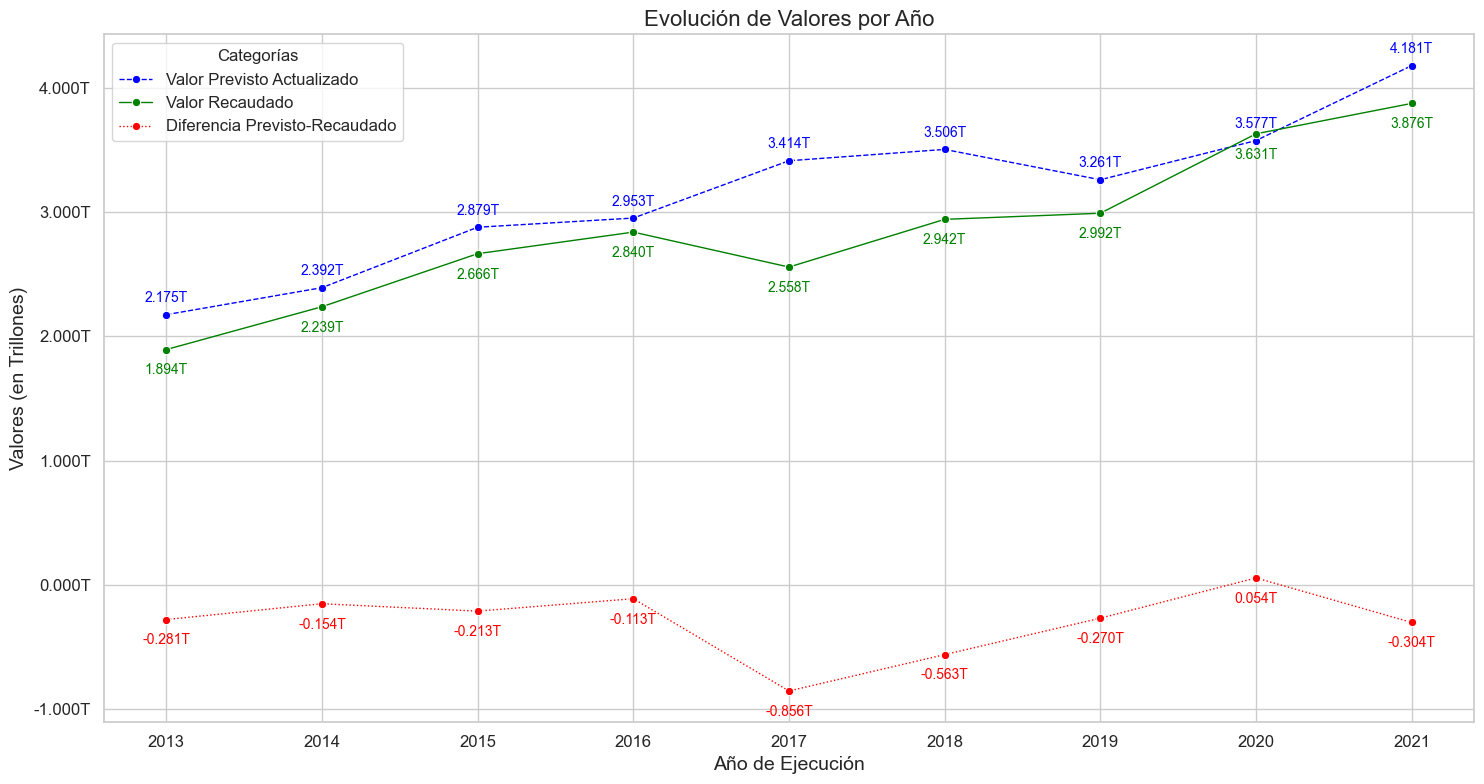

In [12]:
from matplotlib.ticker import FuncFormatter
df_temporal = df_temporal.reset_index()


# Función para formatear el eje Y con trillones y 3 decimales
def trillones_formatter(x, pos):
    return f"{x / 1e12:.3f}T"

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 8))

# Línea para 'valor_previsto_actualizado'
sns.lineplot(
    x=df_temporal["anio_ejecucion"],
    y=df_temporal["valor_previsto_actualizado"],
    marker="o",
    linewidth=1,
    label="Valor Previsto Actualizado",
    linestyle="dashed",
    color="blue",
    ax=ax
)

# Línea para 'valor_recaudado'
sns.lineplot(
    x=df_temporal["anio_ejecucion"],
    y=df_temporal["valor_recaudado"],
    marker="o",
    linewidth=1,
    label="Valor Recaudado",
    linestyle="solid",
    color="green",
    ax=ax
)

# Línea para 'dif_prev_recaudado'
sns.lineplot(
    x=df_temporal["anio_ejecucion"],
    y=df_temporal["dif_prev_recaudado"],
    marker="o",
    linewidth=1,
    label="Diferencia Previsto-Recaudado",
    linestyle="dotted",
    color="red",
    ax=ax
)

# Agregar los valores en los picos de cada línea con separaciones
for idx, row in df_temporal.iterrows():
    # Valor Previsto Actualizado (azul) - encima de la línea
    ax.text(
        row["anio_ejecucion"],
        row["valor_previsto_actualizado"] + 1e11,  # Separación hacia arriba
        f"{row['valor_previsto_actualizado'] / 1e12:.3f}T",
        color="blue",
        fontsize=10,
        ha="center"
    )
    # Valor Recaudado (verde)
    
    ax.text(
        row["anio_ejecucion"],
        row["valor_recaudado"] - 2e11,  # Separación hacia abajo
        f"{row['valor_recaudado'] / 1e12:.3f}T",
        color="green",
        fontsize=10,
        ha="center"
    )
    # Diferencia Previsto-Recaudado (rojo) - debajo de la línea
    ax.text(
        row["anio_ejecucion"],
        row["dif_prev_recaudado"] - 2e11,  # Separación hacia abajo
        f"{row['dif_prev_recaudado'] / 1e12:.3f}T",
        color="red",
        fontsize=10,
        ha="center"
    )

# Configuración del eje Y con trillones y 3 decimales
ax.yaxis.set_major_formatter(FuncFormatter(trillones_formatter))

# Configuración del gráfico
ax.set_title("Evolución de Valores por Año", fontsize=16)
ax.set_ylabel("Valores (en Trillones)", fontsize=14)
ax.set_xlabel("Año de Ejecución", fontsize=14)
ax.tick_params(axis='both', labelsize=12)

plt.legend(title="Categorías", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



# 05.01 Analisis temporal de los valores discriminados por tipo de categoria economica

In [ ]:
# Creamos una nueva columna para unificar categorias
df['categoria_economica_unificada'] = df['categoria_economica'].replace({
    'Receitas de Capital - intra-orçamentárias': 'Receitas de Capital',
    'Receitas Correntes - intra-orçamentárias': 'Receitas Correntes'
})

# Agrupamos por categoria economica
df_categoria_economica = df.groupby(['categoria_economica_unificada','anio_ejecucion'])[['valor_previsto_actualizado','valor_recaudado']].sum() 

#creamos diferencia entre previsto y recaudado
df_categoria_economica["dif_prev_recaudado"] = (df_categoria_economica["valor_recaudado"]-df_categoria_economica["valor_previsto_actualizado"])
df_categoria_economica

valor_previsto_actualizado  \
categoria_economica_unificada anio_ejecucion                               
Receitas Correntes            2013                  1,318,229,086,366.04   
                              2014                  1,408,053,927,988.04   
                              2015                  1,520,294,947,852.52   
                              2016                  1,500,684,141,595.54   
                              2017                  1,486,723,790,514.84   
                              2018                  1,549,351,702,028.28   
                              2019                  1,657,735,960,766.11   
                              2020                  1,736,023,481,017.25   
                              2021                  1,663,914,930,996.52   
Receitas de Capital           2013                    856,421,859,956.00   
                              2014                    984,075,298,131.19   
                              2015                  1,358,532,607,761.40   
                              2016                  1,452,012,106,480.00   
                              2017                  1,927,655,824,167.00   
                              2018                  1,956,296,629,782.00   
                              2019                  1,603,642,738,182.00   
                              2020                  1,841,123,237,893.00   
                              2021                  2,516,801,540,391.00   
Sem informação                2013                                  0.00   
                              2014                                  0.00   
                              2017                                  0.00   
                              2018                                  0.00   
                              2019                                  0.00   
                              2020                                  0.00   
                              2021                                  0.00   

                                                  valor_recaudado  \
categoria_economica_unificada anio_ejecucion                        
Receitas Correntes            2013           1,248,511,650,063.96   
                              2014           1,282,432,199,371.91   
                              2015           1,329,075,326,529.73   
                              2016           1,398,887,278,978.89   
                              2017           1,431,439,703,231.96   
                              2018           1,571,033,795,234.26   
                              2019           1,721,569,470,435.33   
                              2020           1,484,664,063,133.76   
                              2021           1,734,381,432,629.52   
Receitas de Capital           2013             645,102,069,035.82   
                              2014             956,118,879,955.97   
                              2015           1,336,610,048,629.40   
                              2016           1,440,824,304,483.93   
                              2017           1,126,607,709,635.00   
                              2018           1,371,354,077,639.71   
                              2019           1,269,995,267,822.93   
                              2020           2,146,784,566,343.84   
                              2021           2,141,990,592,243.52   
Sem informação                2013                           0.00   
                              2014                           0.00   
                              2017                           0.00   
                              2018                           0.00   
                              2019                           0.00   
                              2020                          46.57   
                              2021                           0.00   

                                              dif_prev_recaudado  
categoria_economica_unificada anio_ejecucion                  

# 05.02. Insight Generales:

## 1. Receitas Correntes
- El valor previsto y el valor recaudado muestran una tendencia creciente entre 2013 y 2021, con una caída significativa en 2020, probablemente debido a factores externos como la pandemia.
- A partir de 2021, los valores recaudados vuelven a superar los previstos, sugiriendo una recuperación económica.

#### Diferencias Notables:
- Entre 2013 y 2017, la diferencia entre lo previsto y lo recaudado es negativa, con déficits que disminuyen progresivamente, alcanzando un mínimo de -55,28 billones en 2017.
- En 2018 y 2019, los valores recaudados superan lo previsto, generando superávits de 21,68 y 63,83 billones, respectivamente.
- En 2020, se registra el mayor déficit en la serie (-251,36 billones), probablemente relacionado con la crisis sanitaria global y sus efectos económicos.
- En 2021, se observa un superávit notable (70,47 billones), lo que podría reflejar una mayor eficiencia en la recaudación o recuperación económica.

## 2. Receitas de Capital
- El valor previsto muestra un crecimiento constante hasta 2021, mientras que los valores recaudados presentan fluctuaciones más marcadas.
- La diferencia entre valores previstos y recaudados presenta variaciones mucho mayores en comparación con las Receitas Correntes, reflejando mayor volatilidad en este segmento.

#### Diferencias Notables:
- Entre 2013 y 2016, los déficits se reducen progresivamente, indicando una mejora en la recaudación frente a lo previsto.
- En 2017, se registra un déficit significativo (-801,05 billones), que refleja una disparidad entre lo previsto y lo recaudado. Este año podría estar marcado por eventos extraordinarios que afectaron las finanzas de capital.
- El año 2020 destaca como una anomalía positiva, con un superávit de 305,66 billones, lo que podría atribuirse a políticas de estímulo o financiamiento extraordinario para afrontar la pandemia.
- En 2021, el déficit vuelve a ser significativo (-374,81 billones), mostrando una posible corrección tras el superávit excepcional del año anterior.

## Conclusiones
#### Desempeño de las Receitas Correntes:
- Son más estables en comparación con las Receitas de Capital.
- A pesar de los déficits en años específicos, los superávits recientes (2018, 2019, y 2021) indican una mejora en la capacidad de planificación y recaudación en este segmento.

#### Volatilidad en las Receitas de Capital:
- Muestran mayor inestabilidad, con déficits considerables en algunos años (2017 y 2021) y un superávit excepcional en 2020.
- Estos movimientos podrían estar relacionados con factores extraordinarios, como crisis económicas o políticas de financiamiento.
#### Impacto de la Pandemia (2020):
- Afectó tanto a las Receitas Correntes (déficit de -251,36 billones) como a las Receitas de Capital (superávit de 305,66 billones), lo que refleja medidas específicas tomadas para mitigar el impacto económico.
#### Tendencias a Largo Plazo:
- Ambas categorías muestran un crecimiento general en los valores previstos, lo que sugiere una ampliación del presupuesto en términos absolutos.
- Las diferencias (positivas y negativas) destacan desafíos en la planificación y ejecución presupuestaria, especialmente en las Receitas de Capital.
- Este análisis sugiere que, aunque hay áreas de mejora en la precisión de la planificación, los resultados recientes apuntan a una recuperación y una mayor estabilidad en la gestión de ingresos.

# 05.03 Grafico

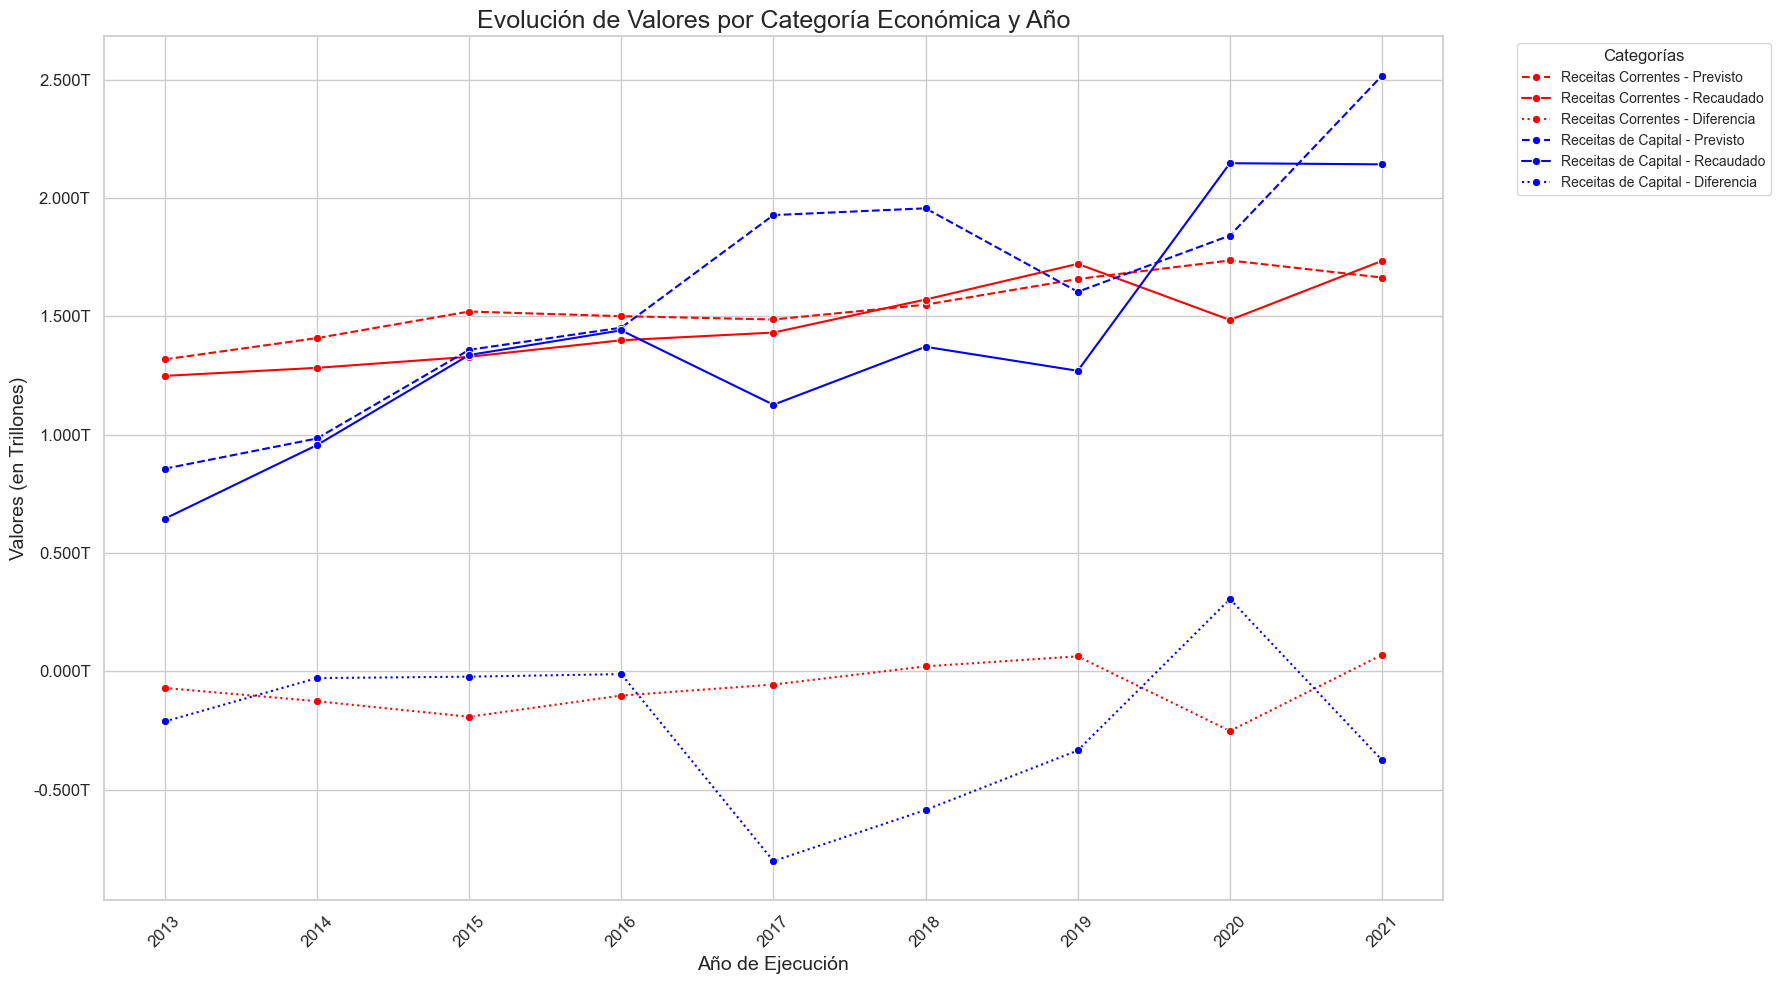

In [21]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos para excluir "Sem informação"
df_categoria_economica_filtrado = df_categoria_economica.loc[
    df_categoria_economica.index.get_level_values('categoria_economica_unificada') != "Sem informação"
]

# Función para formatear el eje Y con trillones y 3 decimales
def trillones_formatter(x, pos):
    return f"{x / 1e12:.3f}T"

# Diccionario de colores por categorías principales
colores_categorias = {
    "Receitas de Capital": "blue",
    "Receitas Correntes": "red"
}

# Diccionario de estilos de línea
estilos_lineas = {
    "Previsto": "dashed",
    "Recaudado": "solid",
    "Diferencia": "dotted"
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(18, 10))

# Graficar cada categoría económica por separado
for categoria, data in df_categoria_economica_filtrado.groupby(level=0):
    # Extraer el nivel específico del índice
    data = data.reset_index(level=0, drop=True)
    categoria_principal = "Receitas de Capital" if "Capital" in categoria else "Receitas Correntes"
    color = colores_categorias[categoria_principal]

    # Línea para 'valor_previsto_actualizado'
    sns.lineplot(
        x=data.index,
        y=data["valor_previsto_actualizado"],
        marker="o",
        linewidth=1.5,
        label=f"{categoria} - Previsto",
        linestyle=estilos_lineas["Previsto"],
        color=color,
        ax=ax
    )

    # Línea para 'valor_recaudado'
    sns.lineplot(
        x=data.index,
        y=data["valor_recaudado"],
        marker="o",
        linewidth=1.5,
        label=f"{categoria} - Recaudado",
        linestyle=estilos_lineas["Recaudado"],
        color=color,
        ax=ax
    )

    # Línea para 'dif_prev_recaudado'
    sns.lineplot(
        x=data.index,
        y=data["dif_prev_recaudado"],
        marker="o",
        linewidth=1.5,
        label=f"{categoria} - Diferencia",
        linestyle=estilos_lineas["Diferencia"],
        color=color,
        ax=ax
    )

# Configuración del eje Y con trillones y 3 decimales
ax.yaxis.set_major_formatter(FuncFormatter(trillones_formatter))

# Configuración del gráfico
ax.set_title("Evolución de Valores por Categoría Económica y Año", fontsize=18)
ax.set_ylabel("Valores (en Trillones)", fontsize=14)
ax.set_xlabel("Año de Ejecución", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=45)
plt.legend(title="Categorías", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()
